In [1]:
import kaggle
import os

kaggle.api.authenticate()
kaggle.api.dataset_download_files('lakshmi25npathi/imdb-dataset-of-50k-movie-reviews', path=os.getcwd(), unzip=True)


In [2]:
#read the data
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('IMDB Dataset.csv')
print(df.shape)
df.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [4]:
# Summary statistics for sentiments

df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [5]:
#Review length summary statistics

df['review_length'] = df['review'].str.split().apply(len)

df['review_length'].describe()

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64

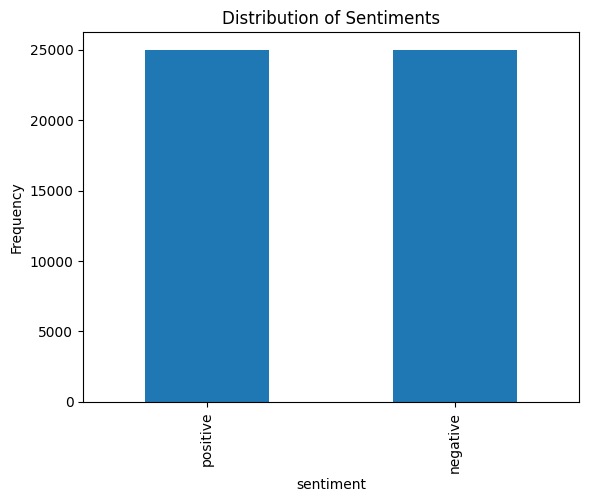

In [6]:
#sentiment Distribution

df['sentiment'].value_counts().plot(kind='bar')

plt.title('Distribution of Sentiments')
plt.ylabel('Frequency')
plt.show()

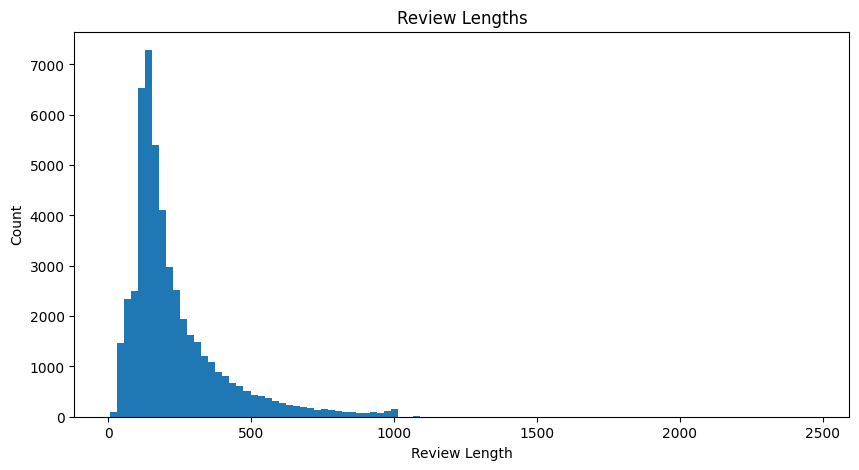

In [7]:
#review Lengths Histogram
import numpy as np

#bins and bin edges using np.histogram
counts, bin_edges = np.histogram(df['review_length'], bins=100)

plt.figure(figsize=(10,5))
plt.hist(df['review_length'], bins=100)

plt.title('Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')

plt.show()

In [8]:
from collections import Counter

all_words = " ".join(df['review']).split()
word_freq = Counter(all_words)

print("Most Common Words:", word_freq.most_common(10))


Most Common Words: [('the', 568735), ('a', 306960), ('and', 301919), ('of', 283625), ('to', 261850), ('is', 203056), ('in', 169981), ('I', 132498), ('that', 126818), ('this', 113726)]


In [9]:
#preprocessing impact
from helper_functions import preprocess_text

sample_review = df['review'].iloc[0]
processed_review, _ = preprocess_text(sample_review, max_length=500)

print("Original Review:", sample_review)
print("Processed Review:", processed_review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ctemi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original Review: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show 

In [11]:
from keras.preprocessing.text import Tokenizer

# Find the max sentence length
max_sentence_length = df.review.str.split().apply(len).max()

# Define a tokenizer outside the function
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['review'])

# Apply the preprocess_text function to the review column
df['preprocessed_review'] = df.review.apply(lambda x: preprocess_text(x, max_length=max_sentence_length, tokenizer=tokenizer)[0])

# Display the DataFrame
df[['review', 'preprocessed_review']].head()


c:\Users\ctemi\OneDrive\Desktop\Coursera\Advanced Data Science Spec\Advanced Data Science Capstone\helper_functions.py:26: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


,review,preprocessed_review
0,One of the other reviewers has mentioned that ...,"[[27, 2102, 1072, 147, 3184, 398, 3195, 203, 6..."
1,A wonderful little production. <br /><br />The...,"[[393, 120, 353, 1385, 2977, 17949, 1582, 411,..."
2,I thought this was a wonderful way to spend ti...,"[[190, 393, 95, 1155, 55, 879, 1494, 2657, 124..."
3,Basically there's a family where a little boy ...,"[[688, 18988, 236, 120, 420, 3639, 1251, 18988..."
4,"Petter Mattei's ""Love in the Time of Money"" is...","[[71841, 112, 55, 290, 2141, 1427, 19, 103, 43..."


In [26]:
all_reviews = " ".join(df['review'])
processed_reviews, tokenizer = preprocess_text(all_reviews, max_length=10000)

print("Vocabulary Size:", len(tokenizer.word_index))



Vocabulary Size: 214479


In [24]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Label encoding


encoder = LabelEncoder()

int_encoded = encoder.fit_transform(df['sentiment'])
print(dict(zip(range(len(encoder.classes_)),encoder.classes_)))


one_hot = to_categorical(int_encoded)
df['one_hot'] = list(one_hot)


df.head(3)

{0: 'negative', 1: 'positive'}


,review,sentiment,review_length,preprocessed_review,one_hot
0,One of the other reviewers has mentioned that ...,positive,307,"[[27, 2102, 1072, 147, 3184, 398, 3195, 203, 6...","[0.0, 1.0]"
1,A wonderful little production. <br /><br />The...,positive,162,"[[393, 120, 353, 1385, 2977, 17949, 1582, 411,...","[0.0, 1.0]"
2,I thought this was a wonderful way to spend ti...,positive,166,"[[190, 393, 95, 1155, 55, 879, 1494, 2657, 124...","[0.0, 1.0]"


In [30]:
#writing the df to a pickle file

df.to_pickle('preprocessed.pkl')